In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:

# Set the style for the plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# Data for ICKG and ProKinO
ickg_data = {
    "Metric": ["Precision", "Recall", "F1-Score", "Jaccard Similarity"],
    "Value": [0.5937, 0.8572, 0.6340, 0.5251],
    "KG": ["ICKG"] * 4
}

prokino_data = {
    "Metric": ["Precision", "Recall", "F1-Score", "Jaccard Similarity"],
    "Value": [0.7350, 0.6791, 0.6958, 0.6790],
    "KG": ["ProKinO"] * 4
}

# Create DataFrame
df = pd.concat([pd.DataFrame(ickg_data), pd.DataFrame(prokino_data)])

# Updated ablation types - removing full_system
ablation_types = ["without_instructions", "without_schema_comments", "without_relevant_nodes"]

# Updated mock data for categories A, B, C for ICKG - removing full_system entries
ickg_categories = {
    "Category": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "Ablation": ablation_types * 3,
    "F1": [0.49, 0.53, 0.51, 0.45, 0.48, 0.43, 0.38, 0.45, 0.40],
    "KG": ["ICKG"] * 9
}

# Updated mock data for categories A, B, C for ProKinO - removing full_system entries
prokino_categories = {
    "Category": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "Ablation": ablation_types * 3,
    "F1": [0.58, 0.63, 0.60, 0.55, 0.59, 0.52, 0.49, 0.54, 0.48],
    "KG": ["ProKinO"] * 9
}

# Create DataFrame for categories
df_categories = pd.concat([pd.DataFrame(ickg_categories), pd.DataFrame(prokino_categories)])

# Component impact data (approximate values based on the script)
component_impact = {
    "Component": ["instructions", "schema_comments", "relevant_nodes"],
    "Impact_ICKG": [0.19, 0.15, 0.17],
    "Impact_ProKinO": [0.17, 0.12, 0.14]
}
df_impact = pd.DataFrame(component_impact)



In [29]:
# # 1. Aggregate metrics comparison
# plt.figure(figsize=(10, 8))
# sns.barplot(x="Metric", y="Value", hue="KG", data=df, palette=["#3498db", "#e74c3c"])
# plt.title("Comparison of Aggregate Metrics between ICKG and ProKinO")
# plt.ylim(0, 1.0)
# plt.ylabel("Value")
# plt.legend(title="Knowledge Graph")
# plt.tight_layout()
# plt.show()

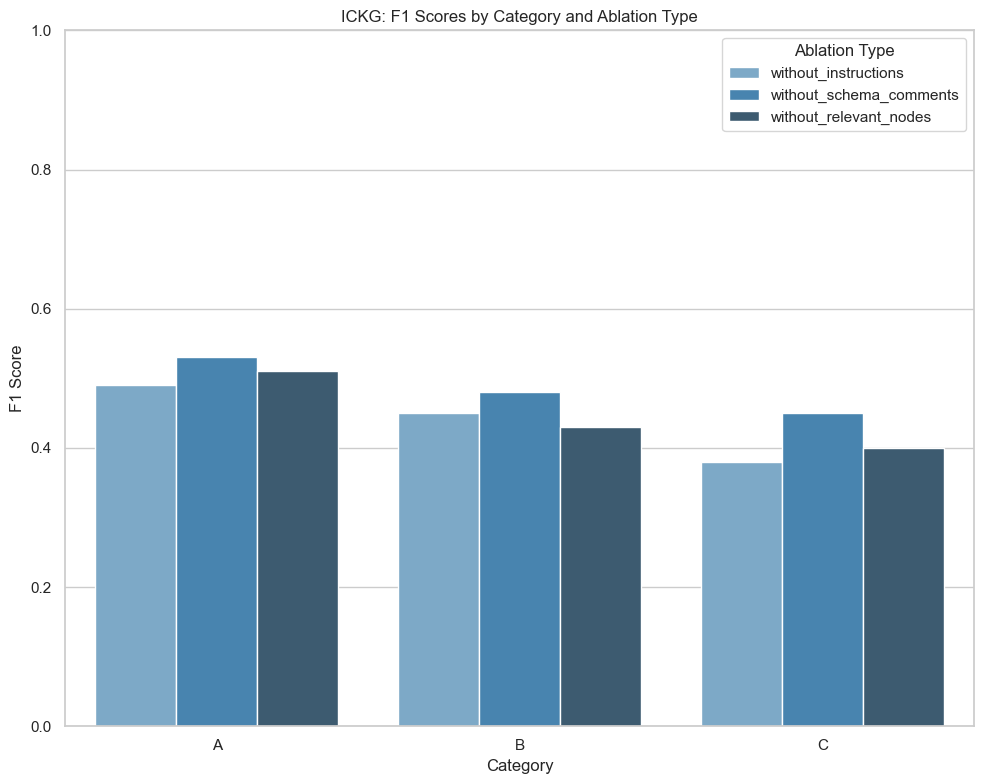

In [30]:
# 2. F1 scores by category and ablation type for ICKG
plt.figure(figsize=(10, 8))
ickg_only = df_categories[df_categories["KG"] == "ICKG"]
sns.barplot(x="Category", y="F1", hue="Ablation", data=ickg_only, palette="Blues_d")
plt.title("ICKG: F1 Scores by Category and Ablation Type")
plt.ylim(0, 1.0)
plt.ylabel("F1 Score")
plt.legend(title="Ablation Type", loc="upper right")
plt.tight_layout()
plt.show()

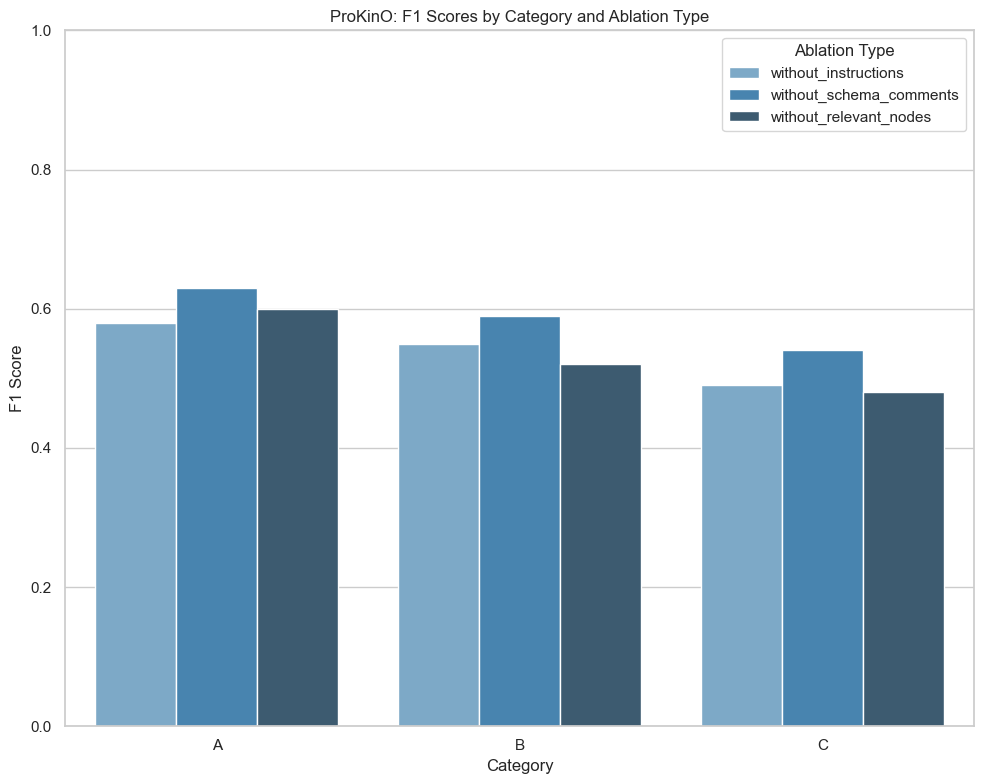

In [33]:
# 3. F1 scores by category and ablation type for ProKinO
plt.figure(figsize=(10, 8))
prokino_only = df_categories[df_categories["KG"] == "ProKinO"]
sns.barplot(x="Category", y="F1", hue="Ablation", data=prokino_only, palette="Blues_d")
plt.title("ProKinO: F1 Scores by Category and Ablation Type")
plt.ylim(0, 1.0)
plt.ylabel("F1 Score")
plt.legend(title="Ablation Type", loc="upper right")
plt.tight_layout()
plt.show()

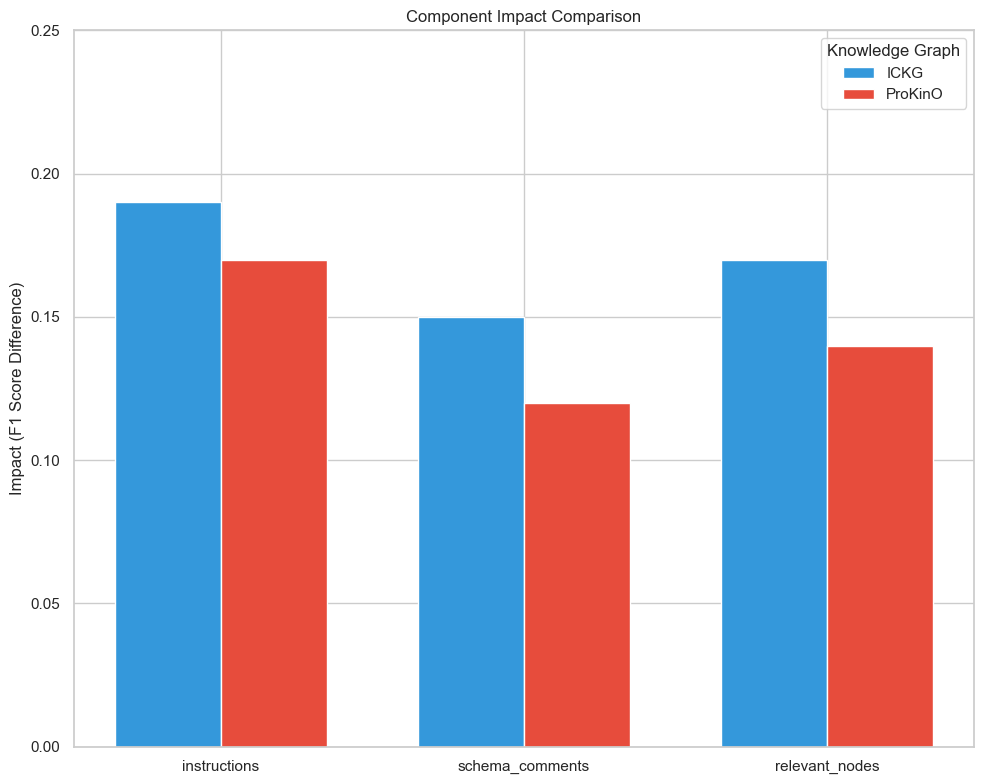

In [32]:
# 4. Component impact comparison
plt.figure(figsize=(10, 8))
indices = np.arange(len(df_impact))
bar_width = 0.35
plt.bar(indices - bar_width/2, df_impact["Impact_ICKG"], bar_width, label="ICKG", color="#3498db")
plt.bar(indices + bar_width/2, df_impact["Impact_ProKinO"], bar_width, label="ProKinO", color="#e74c3c")
plt.title("Component Impact Comparison")
plt.xticks(indices, df_impact["Component"])
plt.ylabel("Impact (F1 Score Difference)")
plt.ylim(0, 0.25)
plt.legend(title="Knowledge Graph")
plt.tight_layout()
plt.show()